In [2]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
x = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 

# to a csv file
x.to_csv('AIDS_ds.csv')

In [3]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('AIDS_ds.csv')

# Display the first few rows of the dataset
print(df.head())

# Create a binary indicator for cd420 or cd820 above a threshold after 20+ weeks
threshold = 500
df['cd4_binary'] = (df['cd420'] < threshold).astype(int)
df['cd8_binary'] = (df['cd820'] > threshold).astype(int)

# Define the features and target variable
features = ['age', 'wtkg', 'homo', 'cd40', 'cd80']
target_cd4 = 'cd4_binary'
target_cd8 = 'cd8_binary'

# Split the data into training and testing sets
X_train_cd4, X_test_cd4, y_train_cd4, y_test_cd4 = train_test_split(df[features], df[target_cd4], test_size=0.2, random_state=42)
X_train_cd8, X_test_cd8, y_train_cd8, y_test_cd8 = train_test_split(df[features], df[target_cd8], test_size=0.2, random_state=42)

# Train a logistic regression model for cd4
model_cd4 = LogisticRegression()
model_cd4.fit(X_train_cd4, y_train_cd4)

# Train a logistic regression model for cd8
model_cd8 = LogisticRegression()
model_cd8.fit(X_train_cd8, y_train_cd8)

# Predict the outcomes for the test set
y_pred_cd4 = model_cd4.predict(X_test_cd4)
y_pred_cd8 = model_cd8.predict(X_test_cd8)

# Print the classification report for cd4
print("Classification Report for CD4:")
print(classification_report(y_test_cd4, y_pred_cd4))

# Print the classification report for CD8
print("Classification Report for CD8:")
print(classification_report(y_test_cd8, y_pred_cd8))

# Predict the outcome for Patient X
patient_x = pd.DataFrame({
    'age': [49],
    'wtkg': [80],
    'homo': [1],
    'cd40': [120],
    'cd80': [680]
})

pred_cd4_patient_x = model_cd4.predict(patient_x)
pred_cd8_patient_x = model_cd8.predict(patient_x)

print(f"Prediction for Patient X (CD4): {'Below Threshold' if pred_cd4_patient_x[0] == 1 else 'Above Threshold'}")
print(f"Prediction for Patient X (CD8): {'Above Threshold' if pred_cd8_patient_x[0] == 1 else 'Below Threshold'}")

   Unnamed: 0  time  trt  age     wtkg  hemo  homo  drugs  karnof  oprior  \
0           0   948    2   48  89.8128     0     0      0     100       0   
1           1  1002    3   61  49.4424     0     0      0      90       0   
2           2   961    3   45  88.4520     0     1      1      90       0   
3           3  1166    3   47  85.2768     0     1      0     100       0   
4           4  1090    0   43  66.6792     0     1      0     100       0   

   ...  gender  str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  
0  ...       0     0      1        0      1       0   422    477   566    324  
1  ...       0     1      3        0      1       0   162    218   392    564  
2  ...       1     1      3        0      1       1   326    274  2063   1893  
3  ...       1     1      3        0      1       0   287    394  1590    966  
4  ...       1     1      3        0      0       0   504    353   870    782  

[5 rows x 24 columns]
Classification Report for CD4:
   

C:\Users\victo\AppData\Local\Temp\ipykernel_25120\4009101214.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cd4_below_500'] = df_filtered['cd420'] < 500
C:\Users\victo\AppData\Local\Temp\ipykernel_25120\4009101214.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cd8_above_500'] = df_filtered['cd820'] > 500


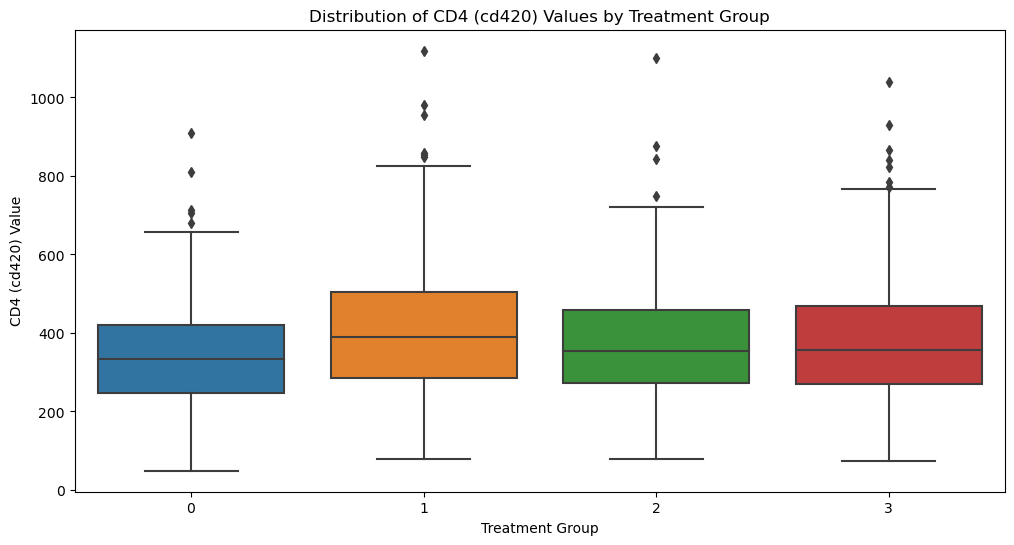

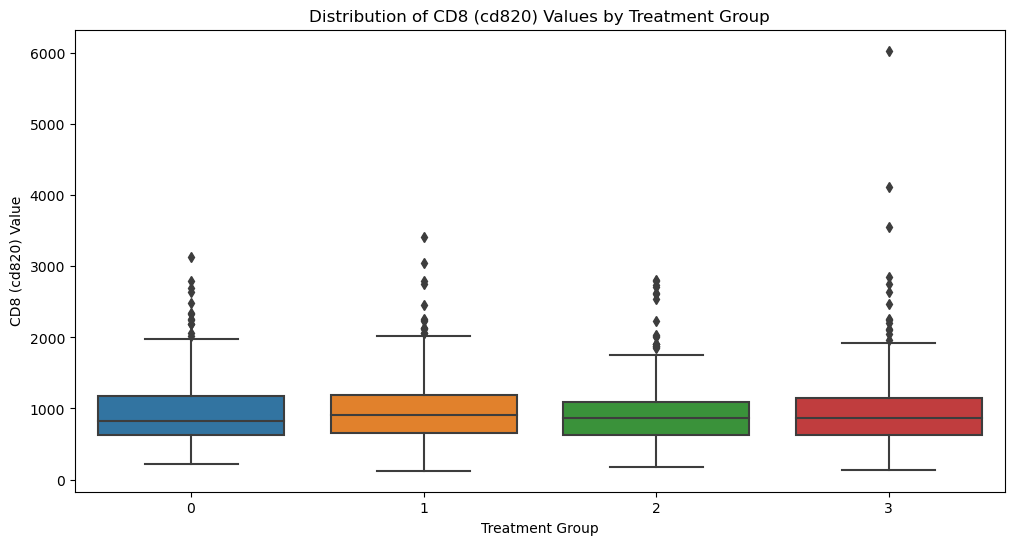

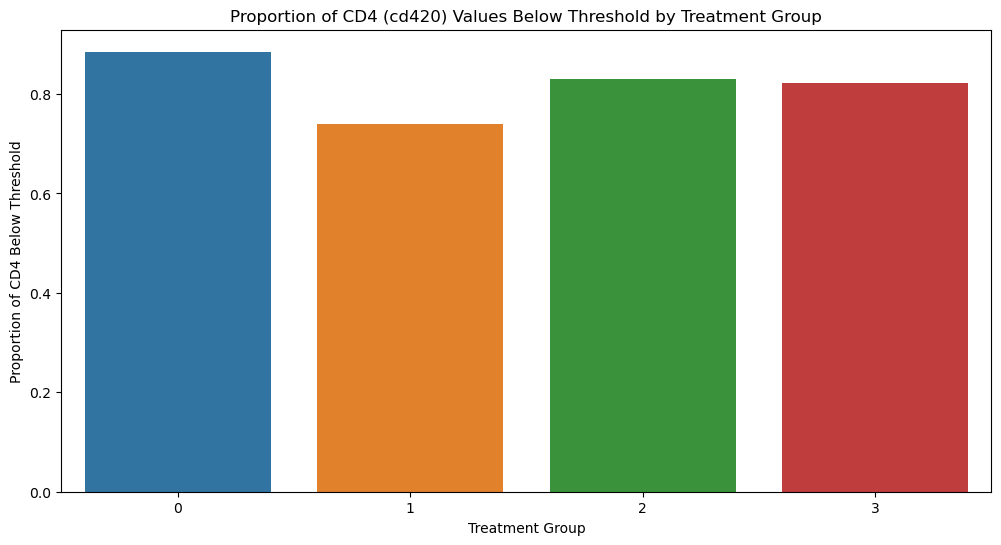

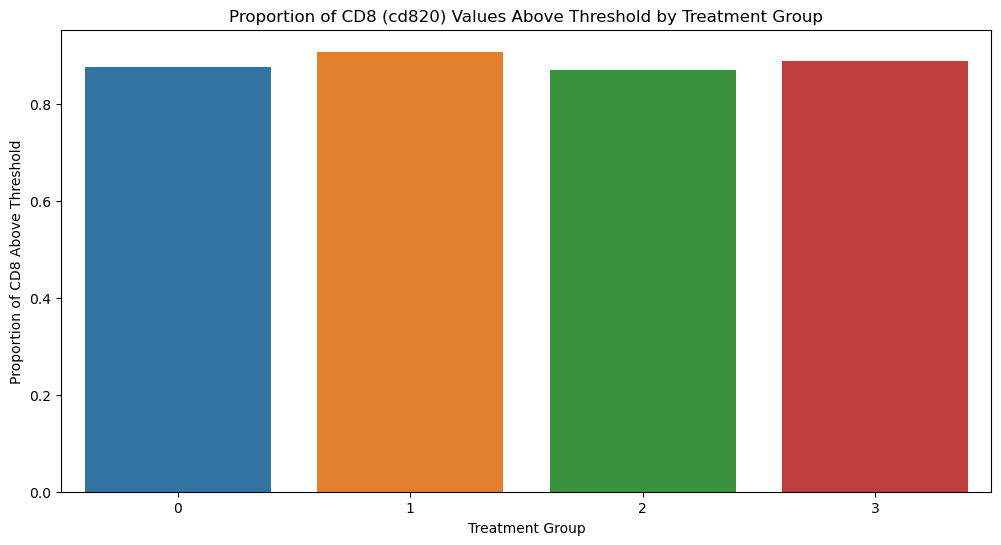

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for records with 20+ weeks of treatment (time >= 140 days)
df_filtered = df[df['time'] >= 140]

# Create binary indicators for cd420 and cd820 based on threshold of 500
df_filtered['cd4_below_500'] = df_filtered['cd420'] < 500
df_filtered['cd8_above_500'] = df_filtered['cd820'] > 500

# Plot the distribution of cd420 values by treatment group
plt.figure(figsize=(12, 6))
sns.boxplot(x='trt', y='cd420', data=df_filtered)
plt.title('Distribution of CD4 (cd420) Values by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('CD4 (cd420) Value')
plt.show()

# Plot the distribution of cd820 values by treatment group
plt.figure(figsize=(12, 6))
sns.boxplot(x='trt', y='cd820', data=df_filtered)
plt.title('Distribution of CD8 (cd820) Values by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('CD8 (cd820) Value')
plt.show()

# Plot the binary indicators for cd420 above threshold by treatment group
plt.figure(figsize=(12, 6))
sns.barplot(x='trt', y='cd4_below_500', data=df_filtered, errorbar=None)
plt.title('Proportion of CD4 (cd420) Values Below Threshold by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Proportion of CD4 Below Threshold')
plt.show()

# Plot the binary indicators for cd820 above threshold by treatment group
plt.figure(figsize=(12, 6))
sns.barplot(x='trt', y='cd8_above_500', data=df_filtered, errorbar=None)
plt.title('Proportion of CD8 (cd820) Values Above Threshold by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Proportion of CD8 Above Threshold')
plt.show()